<a href="https://colab.research.google.com/github/saikumar540/Neural-Networks/blob/main/700765540_Exam2_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
input_shape = x_train.shape[1:]

In [ ]:
def create_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)



In [ ]:
model = create_model()
history = model.fit(x_train, y_train_cat, batch_size=64, epochs=15,
                    validation_data=(x_test, y_test_cat), callbacks=[reduce_lr])


Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.2668 - loss: 1.9343 - val_accuracy: 0.5711 - val_loss: 1.1835 - learning_rate: 0.0010
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.5863 - loss: 1.1481 - val_accuracy: 0.6702 - val_loss: 0.9478 - learning_rate: 0.0010
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.6875 - loss: 0.8828 - val_accuracy: 0.7244 - val_loss: 0.7838 - learning_rate: 0.0010
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7425 - loss: 0.7268 - val_accuracy: 0.7429 - val_loss: 0.7398 - learning_rate: 0.0010
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.7858 - loss: 0.6154 - val_accuracy: 0.7634 - val_loss: 0.6981 - learning_rate: 0.0010
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8150 - loss: 0.5290 - val_accuracy: 0.7749 - val_loss: 0.6635 - learning_rate: 0.0010
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8411 - l

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


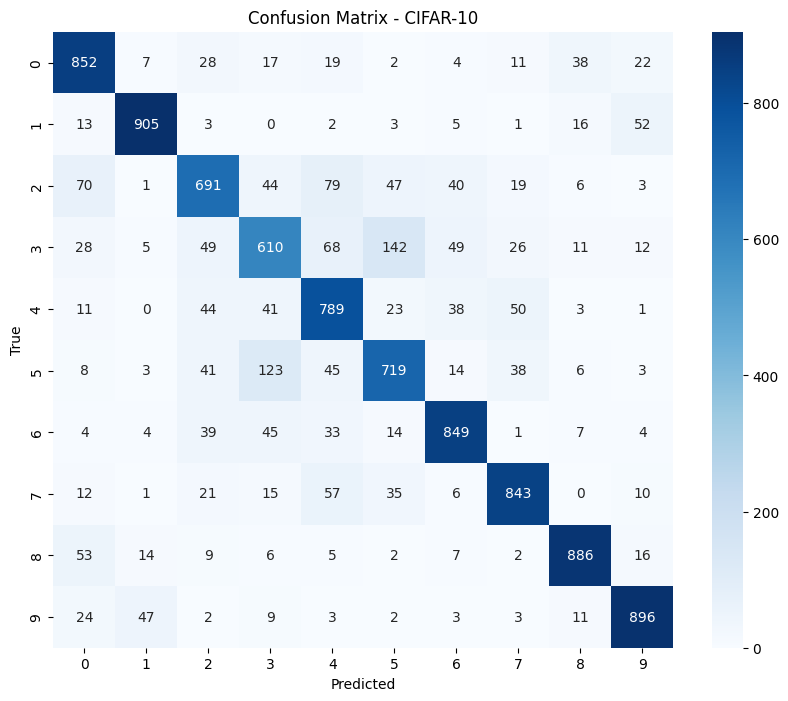

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - CIFAR-10')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


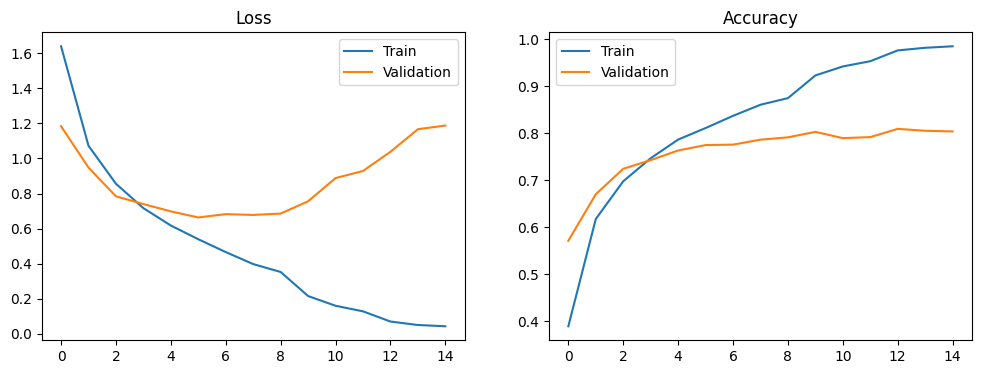

In [ ]:
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.show()


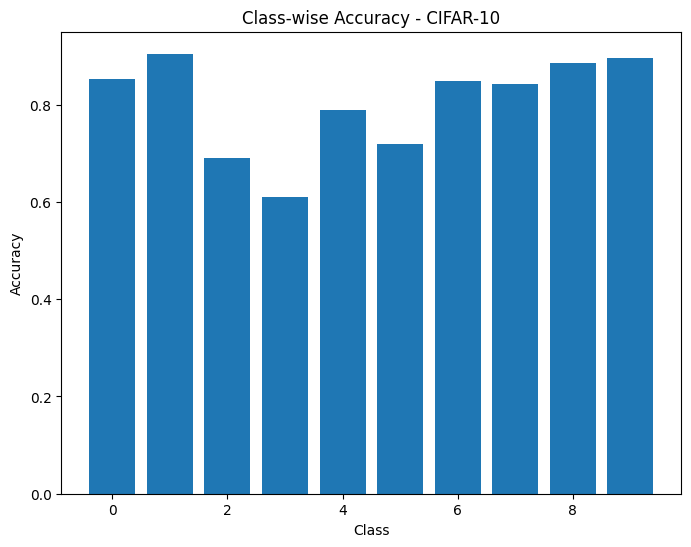

In [ ]:
# Calculate per-class accuracy
class_acc = []
for i in range(10):
    idx = np.where(y_test.flatten() == i)[0]
    acc = np.mean(y_pred[idx] == y_test[idx].flatten())
    class_acc.append(acc)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(range(10), class_acc)
plt.title('Class-wise Accuracy - CIFAR-10')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.show()


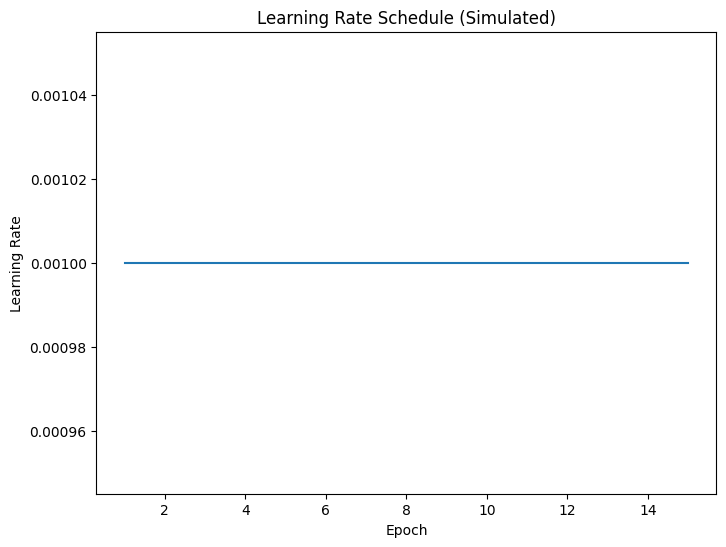

In [ ]:
# Manually plot how ReduceLROnPlateau would adjust over epochs
epochs = range(1, len(history.history['loss']) + 1)
lrs = [0.001] * len(epochs)  # initial lr

plt.figure(figsize=(8, 6))
plt.plot(epochs, lrs)
plt.title('Learning Rate Schedule (Simulated)')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()


https://drive.google.com/file/d/1cZN1t-PWbd1VBTmx4OFL-9W-59-ro-uZ/view?usp=drive_link
